# House Price Predictor Using Linear Regression

Data Source:- Kaggel

The Data is given two diffrent files Training and testing

# The steps taken to create model:
    1.Data Cleaning :
        It includes missing data treatment ,excluding unwanted data
    2.Co-relation check and selecting feature with high corelation
    3.Checking Skewness in data and treating it with log function
    4.Standardisation of data :
        For Categorical data One Hot Encoding is used
        For Continuous data StandardScalar is used
    5.Feature Engineering:
        It includes selection of more relevant features for your machine learning model on basis of P-value
        To select feature with 0.05 or less than ,I created OLS Model.
    6.Model used here is linear Reggression model and it Penalised using Ridge Regression to reduce Error.
    7.Performance metrics used here is Mean Squared Error.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# importing training data file

In [424]:
train=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Datasets/training_set.csv')

In [425]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Dropping un-nesassary features

In [426]:
train=train.drop('Id',axis=1)

#columns with most unique values are unnesassary

# Missing values treatment 

In [427]:
train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [428]:
#features with higer missing values can be dropped

train=train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [429]:
train.isna().sum().sort_values(ascending=False)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
               ... 
TotalBsmtSF       0
Heating           0
MSZoning          0
CentralAir        0
SalePrice         0
Length: 76, dtype: int64

In [430]:
for i in train:
    if(train[i].dtypes=='object'):
        c=train[i].mode()[0]
        train[i]=train[i].fillna(c)         #this iteration replaces missing values from categorical data
    else:
        c=train[i].mean()
        train[i]=train[i].fillna(c)         #this replaces missing values from continuous data  

In [431]:
train.isna().sum().sort_values(ascending=False)

MSSubClass     0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 76, dtype: int64

# Co-relation check 

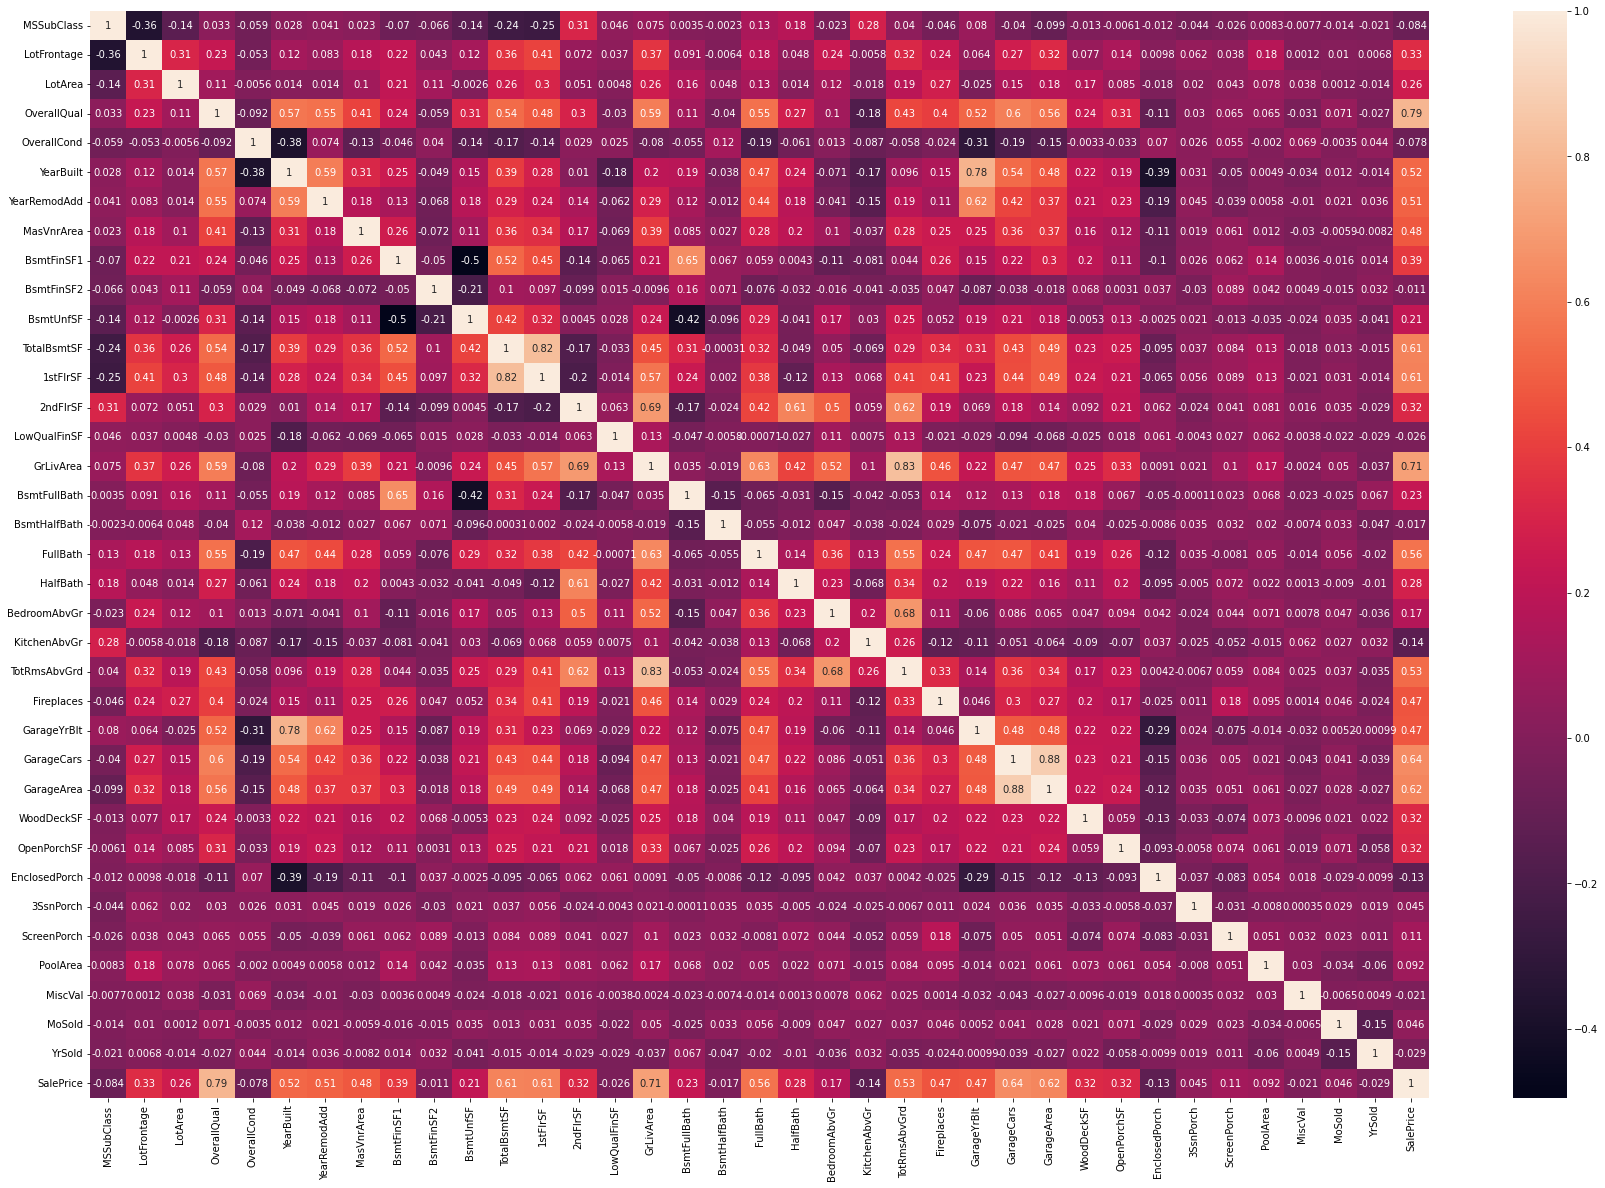

In [432]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sb.heatmap(train.corr(),annot=True)
plt.show()

In [433]:
D=train.corr()['SalePrice'].sort_values(ascending=False)
D

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [434]:
D=pd.DataFrame(D)
D.columns=['skew']

In [435]:
D

,skew
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [436]:
E=D[(D['skew']<0.15)].index
E

Index(['ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
       'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond',
       'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [437]:
train=train.drop(labels=E,axis=1)
train

#dropped features with less than 0.15 

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,548,TA,TA,Y,0,61,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2,460,TA,TA,Y,298,0,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,608,TA,TA,Y,0,42,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,642,TA,TA,Y,0,35,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,836,TA,TA,Y,192,84,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,2,460,TA,TA,Y,0,40,WD,Normal,175000
1456,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,2,500,TA,TA,Y,349,0,WD,Normal,210000
1457,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,1,252,TA,TA,Y,0,60,WD,Normal,266500
1458,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,1,240,TA,TA,Y,366,0,WD,Normal,142125


# Skewness in Data

In [28]:
cat=[]
con=[]
for i in train2.columns:
    if(train2[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)                      #features separated on basis of categorical and continuous

In [196]:
con1=['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF']        #excluded features including years and saleprice

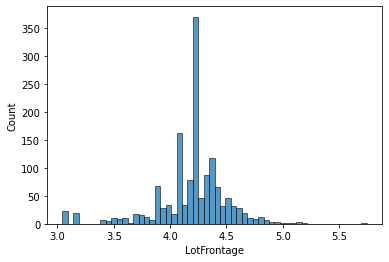

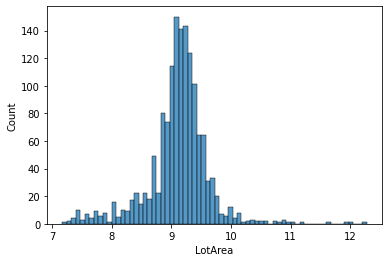

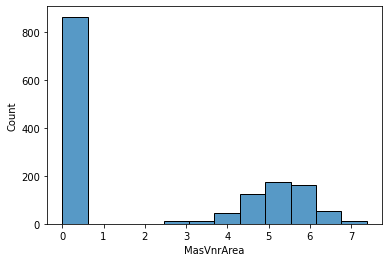

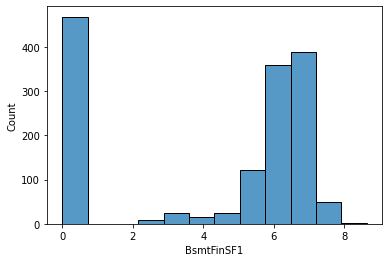

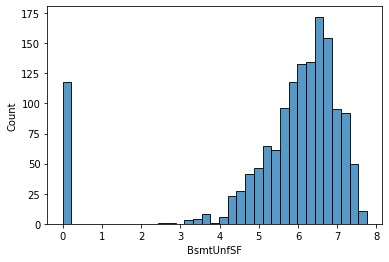

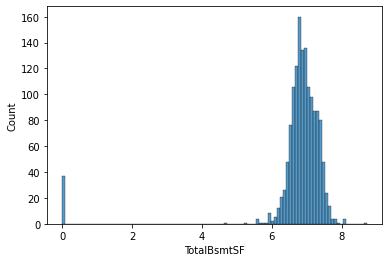

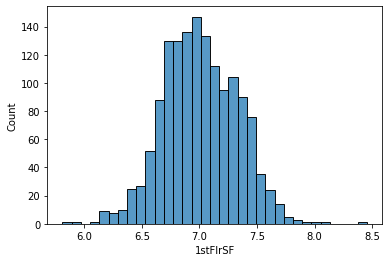

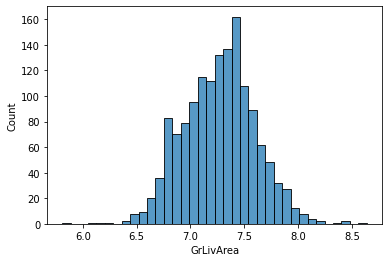

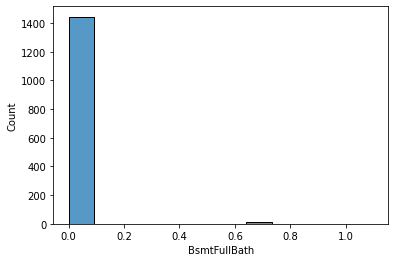

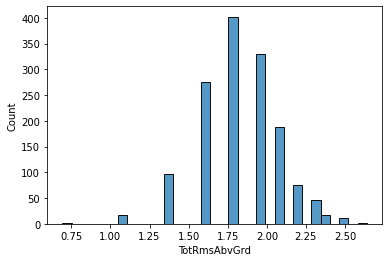

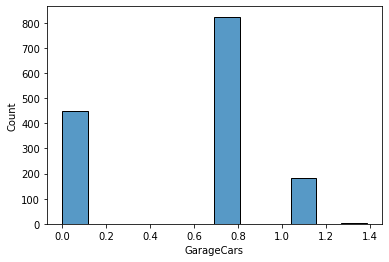

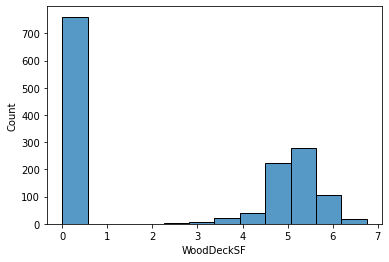

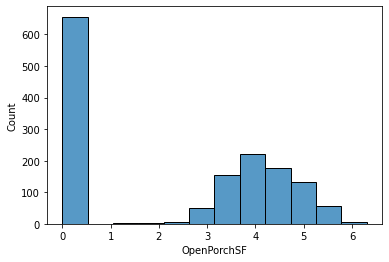

In [197]:
for i in con1:
    sb.histplot(train[i])
    plt.show()

In [190]:
train.skew().sort_values(ascending=False)

LotArea         12.207688
MasVnrArea       2.676412
LotFrontage      2.384950
OpenPorchSF      2.364342
SalePrice        1.882876
BsmtFinSF1       1.685503
WoodDeckSF       1.541376
TotalBsmtSF      1.524255
1stFlrSF         1.376757
GrLivArea        1.366560
BsmtUnfSF        0.920268
2ndFlrSF         0.813030
TotRmsAbvGrd     0.676341
HalfBath         0.675897
Fireplaces       0.649565
BsmtFullBath     0.596067
OverallQual      0.216944
BedroomAbvGr     0.211790
GarageArea       0.179981
FullBath         0.036562
GarageCars      -0.342549
YearRemodAdd    -0.503562
YearBuilt       -0.613461
GarageYrBlt     -0.668175
dtype: float64

In [191]:
def skew_rem(df,col):
    q = []
    for i in df[col]:
        if(i != 0):
            q.append(np.log(i))
        else:
            q.append(i)
    df[col] = q                #created a function to perform log function on skewed feature excluding 0 values ,
                                 # because log of 0 is infinite           

In [194]:
for i in con1:
    skew_rem(train,i)        #iterated the function through all skewed features

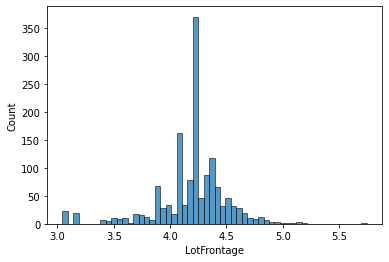

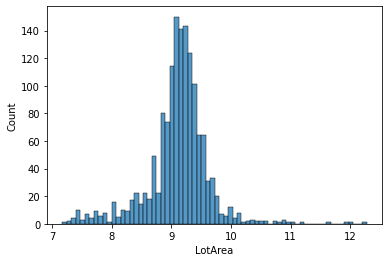

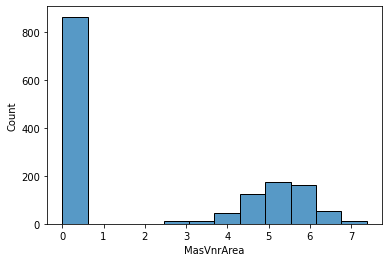

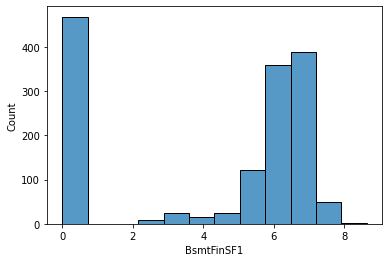

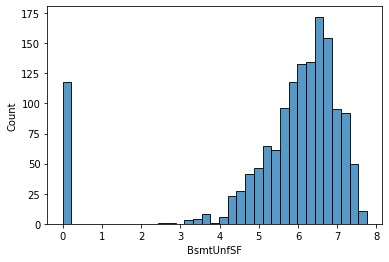

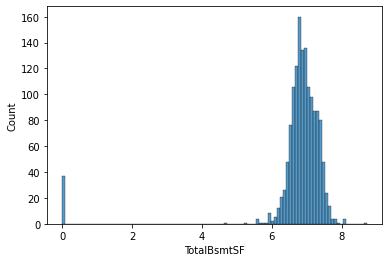

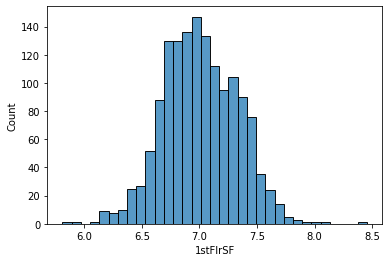

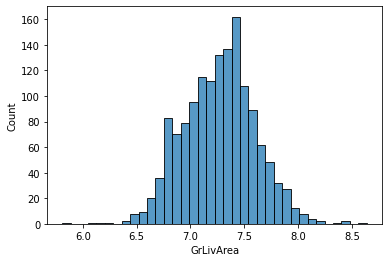

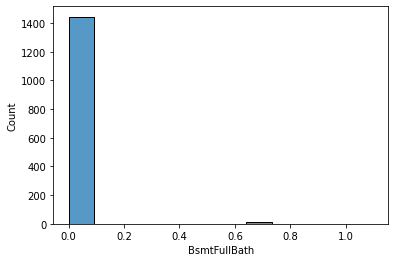

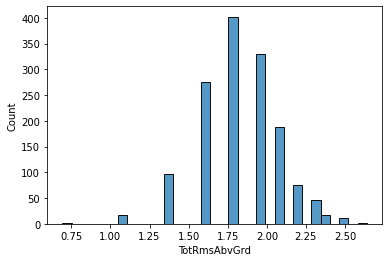

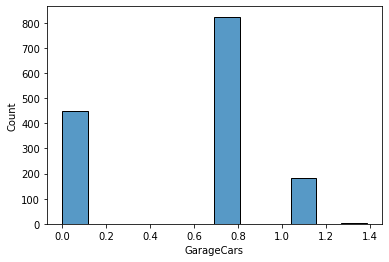

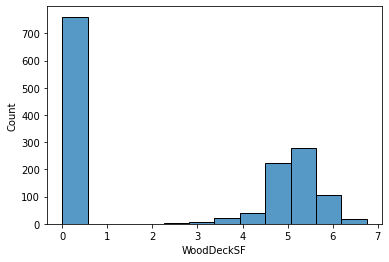

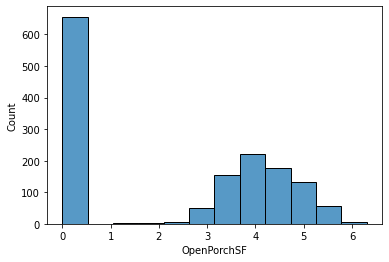

In [198]:
for i in con1:
    sb.histplot(train[i])
    plt.show()                     # here we can see skew has been removed

# Data Standardisation 

One hot Encoding for categorical data

In [199]:
train_cat=pd.DataFrame(train[cat])
train_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [200]:
train_cat=pd.get_dummies(train_cat)

In [201]:
train_cat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


for continuous data we will use StandardScalar 

In [202]:
train_con=pd.DataFrame(train[con])
train_con

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,4.174387,9.041922,1.945910,2003,2003,5.278115,6.559615,5.010635,6.752270,6.752270,...,0.693147,1.098612,2.079442,0.000000,2003.0,0.693147,6.306275,0.000000,4.110874,208500
1,4.382027,9.169518,1.791759,1976,1976,0.000000,6.885510,5.648974,7.140453,7.140453,...,0.693147,1.098612,1.791759,0.000000,1976.0,0.693147,6.131226,5.697093,0.000000,181500
2,4.219508,9.328123,1.945910,2001,2002,5.087596,6.186209,6.073045,6.824374,6.824374,...,0.693147,1.098612,1.791759,0.000000,2001.0,0.693147,6.410175,0.000000,3.737670,223500
3,4.094345,9.164296,1.945910,1915,1970,0.000000,5.375278,6.291569,6.628041,6.867974,...,0.000000,1.098612,1.945910,0.000000,1998.0,1.098612,6.464588,0.000000,3.555348,140000
4,4.430817,9.565214,2.079442,2000,2000,5.857933,6.484635,6.194405,7.043160,7.043160,...,0.693147,1.386294,2.197225,0.000000,2000.0,1.098612,6.728629,5.257495,4.430817,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,8.976768,1.791759,1999,2000,0.000000,0.000000,6.859615,6.859615,6.859615,...,0.693147,1.098612,1.945910,0.000000,1999.0,0.693147,6.131226,0.000000,3.688879,175000
1456,4.442651,9.486076,1.791759,1978,1988,4.779123,6.672033,6.378426,7.340836,7.636752,...,0.693147,1.098612,1.945910,0.693147,1978.0,0.693147,6.214608,5.855072,0.000000,210000
1457,4.189655,9.109636,1.945910,1941,2006,0.000000,5.616771,6.776507,7.049255,7.080026,...,0.693147,1.386294,2.197225,0.693147,1941.0,0.000000,5.529429,0.000000,4.094345,266500
1458,4.219508,9.181632,1.609438,1950,1996,0.000000,3.891820,0.000000,6.982863,6.982863,...,0.000000,0.693147,1.609438,0.000000,1950.0,0.000000,5.480639,5.902633,0.000000,142125


In [203]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_con=pd.DataFrame(ss.fit_transform(train_con),columns=con)
train_con

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,-0.084142,-0.133231,0.684385,1.050994,0.878668,1.193663,0.779929,-0.342335,0.002389,-0.803570,...,0.847733,0.282464,0.943826,-0.297152,1.021157,0.423995,0.344001,-0.946448,0.845412,0.347273
1,0.563447,0.113442,0.045487,0.156734,-0.429577,-0.815039,0.888887,0.001950,0.341327,0.418585,...,0.847733,0.282464,-0.208385,-0.297152,-0.104483,0.423995,0.223637,1.251026,-1.071354,0.007288
2,0.056580,0.420061,0.684385,0.984752,0.830215,1.121157,0.655085,0.230671,0.065346,-0.576560,...,0.847733,0.282464,-0.208385,-0.297152,0.937776,0.423995,0.415443,-0.946448,0.671399,0.536154
3,-0.333780,0.103347,0.684385,-1.863632,-0.720298,-0.815039,0.383960,0.348531,-0.106080,-0.439287,...,-1.087077,0.282464,0.409012,-0.297152,0.812705,1.491784,0.452857,-0.946448,0.586389,-0.515281
4,0.715614,0.878409,1.237824,0.951632,0.733308,1.414325,0.754860,0.296126,0.256376,0.112267,...,0.847733,1.203273,1.415565,-0.297152,0.896086,1.491784,0.634412,1.081465,0.994591,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.231515,-0.259188,0.045487,0.918511,0.733308,-0.815039,-1.413200,0.654904,0.096116,-0.465607,...,0.847733,0.282464,0.409012,-0.297152,0.854395,0.423995,0.223637,-0.946448,0.648650,-0.074560
1456,0.752524,0.725419,0.045487,0.222975,0.151865,1.003761,0.817514,0.395377,0.516289,1.981135,...,0.847733,0.282464,0.409012,3.232179,-0.021102,0.423995,0.280971,1.311961,-1.071354,0.366161
1457,-0.036525,-0.002325,0.684385,-1.002492,1.024029,-0.815039,0.464700,0.610080,0.261698,0.228338,...,0.847733,1.203273,1.415565,3.232179,-1.563645,-1.401403,-0.190159,-0.946448,0.837705,1.077611
1458,0.056580,0.136861,-0.710169,-0.704406,0.539493,-0.815039,-0.112017,-3.044798,0.203729,-0.077573,...,-1.087077,-1.015344,-0.938610,-0.297152,-1.188432,-1.401403,-0.223707,1.330307,-1.071354,-0.488523


In [204]:
train_stan=pd.concat([train_con,train_cat],axis=1)
train_stan

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.084142,-0.133231,0.684385,1.050994,0.878668,1.193663,0.779929,-0.342335,0.002389,-0.803570,...,0,0,0,1,0,0,0,0,1,0
1,0.563447,0.113442,0.045487,0.156734,-0.429577,-0.815039,0.888887,0.001950,0.341327,0.418585,...,0,0,0,1,0,0,0,0,1,0
2,0.056580,0.420061,0.684385,0.984752,0.830215,1.121157,0.655085,0.230671,0.065346,-0.576560,...,0,0,0,1,0,0,0,0,1,0
3,-0.333780,0.103347,0.684385,-1.863632,-0.720298,-0.815039,0.383960,0.348531,-0.106080,-0.439287,...,0,0,0,1,1,0,0,0,0,0
4,0.715614,0.878409,1.237824,0.951632,0.733308,1.414325,0.754860,0.296126,0.256376,0.112267,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.231515,-0.259188,0.045487,0.918511,0.733308,-0.815039,-1.413200,0.654904,0.096116,-0.465607,...,0,0,0,1,0,0,0,0,1,0
1456,0.752524,0.725419,0.045487,0.222975,0.151865,1.003761,0.817514,0.395377,0.516289,1.981135,...,0,0,0,1,0,0,0,0,1,0
1457,-0.036525,-0.002325,0.684385,-1.002492,1.024029,-0.815039,0.464700,0.610080,0.261698,0.228338,...,0,0,0,1,0,0,0,0,1,0
1458,0.056580,0.136861,-0.710169,-0.704406,0.539493,-0.815039,-0.112017,-3.044798,0.203729,-0.077573,...,0,0,0,1,0,0,0,0,1,0


setting target feature as y

In [207]:
y=train[['SalePrice']]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [223]:
x=train_stan.drop('SalePrice',axis=1)         #contains all dependent feature

# Feature engineering

In [378]:
from statsmodels.api import OLS,add_constant
const=add_constant(x)
ols=OLS(y,const)
model=ols.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        18:16:30   Log-Likelihood:                -16834.
No. Observations:                1460   AIC:                         3.388e+04
Df Residuals:                    1354   BIC:                         3.444e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.379e+04   1.66e+04      2.640      0.008    1.12e+04    7.63e+04
LotArea               9715.5878   1196.587      8.119      0.000    7368.222    1.21e+04
OverallQual           8055.4795   1289.416      6.247      0.000    5526.009    1.06e+04
YearBuilt             7218.3772   1836.421      3.931      0.000    3615.838    1.08e+04
YearRemodAdd          4742.4305   1023.100      4.635      0.000    2735.398    6749.463
BsmtFinSF1            1.728e+04   3060.564      5.645      0.000    1.13e+04    2.33e+04
1stFlrSF              9456.5420   2732.331      3.461      0.001    4096.481    1.48e+04
2ndFlrSF              1.145e+04   3223.657      3.553      0.000    5129.680    1.78e+04
GrLivArea             1.844e+04   3383.385      5.450      0.000    1.18e+04    2.51e+04
BsmtFullBath          1404.1058    819.941      1.712      0.087    -204.388    3012.599
FullBath              2948.2682   1161.997      2.537      0.011     668.758    5227.779
BedroomAbvGr         -1839.2984   1016.512     -1.809      0.071   -3833.408     154.812
Fireplaces            3197.2313    780.754      4.095      0.000    1665.612    4728.850
GarageCars            4132.3955   1046.146      3.950      0.000    2080.153    6184.638
WoodDeckSF            1301.7514    770.413      1.690      0.091    -209.581    2813.084
MSZoning_C (all)     -2.793e+04   9788.122     -2.854      0.004   -4.71e+04   -8732.372
Street_Pave           2.695e+04   1.22e+04      2.218      0.027    3115.085    5.08e+04
LandContour_HLS       8978.4299   4932.277      1.820      0.069    -697.304    1.87e+04
LandContour_Lvl       6237.8388   3438.423      1.814      0.070    -507.376     1.3e+04
LotConfig_Corner      1.302e+04   4076.537      3.194      0.001    5024.871     2.1e+04
LotConfig_CulDSac     2.052e+04   4664.836      4.398      0.000    1.14e+04    2.97e+04
LotConfig_Inside      1.132e+04   3816.281      2.965      0.003    3829.232    1.88e+04
LandSlope_Gtl         2.087e+04   9488.982      2.200      0.028    2257.093    3.95e+04
LandSlope_Mod         2.384e+04   9574.225      2.490      0.013    5060.026    4.26e+04
Neighborhood_BrDale   1.133e+04   7618.537      1.487      0.137   -3616.112    2.63e+04
Neighborhood_ClearCr -2.069e+04   6248.215     -3.311      0.001   -3.29e+04   -8430.365
Neighborhood_CollgCr -1.596e+04   3339.372     -4.778      0.000   -2.25e+04   -9404.912
Neighborhood_Crawfor  1.231e+04   4840.215      2.544      0.011    2817.106    2.18e+04
Neighborhood_Edwards -2.184e+04   3632.685     -6.013      0.000    -2.9e+04   -1.47e+04
Neighborhood_Gilbert -2.351e+04   4147.174     -5.669      0.000   -3.16e+04   -1.54e+04
Neighborhood_IDOTRR  -1.183e+04   5682.216     -2.082      0.038    -2.3e+04    -683.266
Neighborhood_Mitchel  -2.92e+04   4745.581     -6.153    

In [373]:
A=pd.DataFrame(model.pvalues,columns=['pvals']).round(3)

In [374]:
A.drop('const',axis=0,inplace=True)

In [375]:
A.sort_values(by='pvals',ascending=False)

,pvals
Condition2_Norm,0.275
GarageType_2Types,0.231
FireplaceQu_Ex,0.229
RoofMatl_Roll,0.218
Exterior2nd_Plywood,0.205
...,...
RoofMatl_WdShake,0.000
RoofMatl_WdShngl,0.000
Exterior1st_BrkFace,0.000
Exterior2nd_ImStucc,0.000


In [376]:
drop_col=A[A.pvals >0.200 ].index
print(drop_col)

Index(['Condition2_Norm', 'RoofMatl_Roll', 'Exterior2nd_Plywood',
       'FireplaceQu_Ex', 'GarageType_2Types'],
      dtype='object')


In [377]:
x=x.drop(labels=drop_col,axis=1)

In [379]:
x

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,GarageFinish_Fin,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,SaleType_New,SaleCondition_Normal
0,-0.133231,0.684385,1.050994,0.878668,0.779929,-0.803570,1.180602,0.529260,-0.104284,0.847733,...,0,0,0,0,0,0,1,0,0,1
1,0.113442,0.045487,0.156734,-0.429577,0.888887,0.418585,-0.870108,-0.381846,-0.104284,0.847733,...,0,0,0,0,0,0,1,0,0,1
2,0.420061,0.684385,0.984752,0.830215,0.655085,-0.576560,1.184842,0.659675,-0.104284,0.847733,...,0,0,0,0,0,0,1,0,0,1
3,0.103347,0.684385,-1.863632,-0.720298,0.383960,-0.439287,1.143571,0.541511,-0.104284,-1.087077,...,0,1,0,0,0,0,1,0,0,0
4,0.878409,1.237824,0.951632,0.733308,0.754860,0.112267,1.244241,1.282191,-0.104284,0.847733,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.259188,0.045487,0.918511,0.733308,-1.413200,-0.465607,1.117574,0.416680,-0.104284,0.847733,...,0,0,0,0,0,0,1,0,0,1
1456,0.725419,0.045487,0.222975,0.151865,0.817514,1.981135,-0.870108,1.106592,-0.104284,0.847733,...,0,1,0,0,0,0,1,0,0,1
1457,-0.002325,0.684385,-1.002492,1.024029,0.464700,0.228338,1.271540,1.469942,-0.104284,0.847733,...,0,0,0,0,0,0,1,0,0,1
1458,0.136861,-0.710169,-0.704406,0.539493,-0.112017,-0.077573,-0.870108,-0.854471,-0.104284,-1.087077,...,0,1,0,0,0,0,1,0,0,1


In [380]:
test_col=x.columns         #for feature matching

# Regression Model Creation

In [383]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=31)

In [384]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
model=le.fit(xtrain,ytrain)

In [385]:
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)

In [389]:
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(pred_tr,ytrain)
ts_err = mean_absolute_error(pred_ts,ytest)

In [390]:
tr_err

16011.540239726028

In [391]:
ts_err
#its clearly shows overfitting

9203217157297.113

# Regularised model creation 

In [398]:
W = []
X = 0.05
for i in range(0,1000,1):
    W.append(round(X+0.01,3))
    X = x+0.01

In [399]:
from sklearn.linear_model import Ridge
rr = Ridge()
tg = {'alpha':W}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tg,scoring="neg_mean_absolute_error",cv=5)

cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 0.06}

In [400]:
c = cvmodel.best_params_['alpha']
rr = Ridge(alpha=c)
rrmodel = rr.fit(xtrain,ytrain)
pred_tr1=rrmodel.predict(xtrain)
pred_ts1=rrmodel.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err1 = mean_absolute_error(ytrain,pred_tr1)
ts_err1 = mean_absolute_error(ytest,pred_ts1)


In [401]:
tr_err1

15608.27772666373

In [402]:
ts_err1

19461.57018318044

In [403]:
ts_err1-tr_err1

3853.2924565167104

# importing test data

In [483]:
test=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Datasets/testing_set.csv')

In [484]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Dropping un-nesassary features

In [446]:
test=test.drop('Id',axis=1)

# Missing values treatment

In [447]:
test.isna().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 79, dtype: int64

In [448]:
#features with higer missing values can be dropped

test=test.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [449]:
test.isna().sum().sort_values(ascending=False).head(20)

FireplaceQu     730
LotFrontage     227
GarageQual       78
GarageFinish     78
GarageCond       78
GarageYrBlt      78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
Functional        2
BsmtFullBath      2
Utilities         2
GarageCars        1
dtype: int64

In [450]:
for i in test:
    if(test[i].dtypes=='object'):
        c=test[i].mode()[0]
        test[i]=test[i].fillna(c)         #this iteration replaces missing values from categorical data
    else:
        c=test[i].mean()
        test[i]=test[i].fillna(c)         #this replaces missing values from continuous data  

In [451]:
test.isna().sum().sort_values(ascending=False)

MSSubClass       0
GarageType       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
SaleCondition    0
Length: 75, dtype: int64

# Corelation check 

In [452]:
test=test.drop(E,axis=1)

In [453]:
test

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,1.0,730.0,TA,TA,Y,140,0,WD,Normal
1,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Unf,1.0,312.0,TA,TA,Y,393,36,WD,Normal
2,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Fin,2.0,482.0,TA,TA,Y,212,34,WD,Normal
3,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Fin,2.0,470.0,TA,TA,Y,360,36,WD,Normal
4,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,RFn,2.0,506.0,TA,TA,Y,0,82,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,Unf,0.0,0.0,TA,TA,Y,0,0,WD,Normal
1455,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,Unf,1.0,286.0,TA,TA,Y,0,24,WD,Abnorml
1456,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Unf,2.0,576.0,TA,TA,Y,474,0,WD,Abnorml
1457,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Unf,0.0,0.0,TA,TA,Y,80,32,WD,Normal


# Skewness in Data

In [454]:
test.skew().sort_values(ascending=False)

LotArea         3.115217
OpenPorchSF     2.687779
MasVnrArea      2.546474
WoodDeckSF      2.130760
1stFlrSF        1.558195
BsmtFinSF1      1.166076
GrLivArea       1.130402
BsmtUnfSF       0.920231
2ndFlrSF        0.912883
TotRmsAbvGrd    0.842597
Fireplaces      0.819858
TotalBsmtSF     0.813868
LotFrontage     0.720188
HalfBath        0.714728
BsmtFullBath    0.650143
BedroomAbvGr    0.436623
GarageArea      0.300342
FullBath        0.295839
OverallQual     0.181196
GarageCars     -0.107178
GarageYrBlt    -0.162765
YearRemodAdd   -0.399906
YearBuilt      -0.587657
dtype: float64

In [455]:
con2=['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF']

In [456]:
for i in con2:
    skew_rem(test,i)        #iterated the function through all skewed features same as in train data

In [457]:
test.skew().sort_values(ascending=False)

2ndFlrSF        0.912883
Fireplaces      0.819858
TotalBsmtSF     0.813868
HalfBath        0.714728
BsmtFullBath    0.650143
MasVnrArea      0.531596
BedroomAbvGr    0.436623
GarageArea      0.300342
FullBath        0.295839
OverallQual     0.181196
WoodDeckSF      0.164330
1stFlrSF        0.052527
GrLivArea       0.027624
TotRmsAbvGrd    0.024524
OpenPorchSF    -0.053498
GarageYrBlt    -0.162765
GarageCars     -0.224674
YearRemodAdd   -0.399906
YearBuilt      -0.587657
BsmtFinSF1     -0.617526
LotArea        -0.916037
LotFrontage    -1.164436
BsmtUnfSF      -2.131465
dtype: float64

# Standardisation of Data

In [458]:
test_cat=pd.DataFrame(test[cat])
test_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Gd,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [459]:
test_cat=pd.get_dummies(test_cat)
test_cat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [461]:
con.remove('SalePrice')

In [462]:
test_con=pd.DataFrame(test[con])
test_con

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,4.382027,9.360655,5,1961,1961,0.000000,6.148468,5.598422,882.0,6.797940,...,0.0,1,2,1.609438,0,1961.000000,0.000000,730.0,4.941642,0.000000
1,4.394449,9.565704,6,1958,1958,4.682131,6.827629,6.006353,1329.0,7.192182,...,0.0,1,3,1.791759,0,1958.000000,0.000000,312.0,5.973810,3.583519
2,4.304065,9.534595,5,1997,1998,0.000000,6.673298,4.919981,928.0,6.833032,...,0.0,2,3,1.791759,1,1997.000000,0.693147,482.0,5.356586,3.526361
3,4.356709,9.208138,6,1998,1998,2.995732,6.400257,5.780744,926.0,6.830874,...,0.0,2,3,1.945910,1,1998.000000,0.693147,470.0,5.886104,3.583519
4,3.761200,8.518193,8,1992,1992,0.000000,5.572154,6.924612,1280.0,7.154615,...,0.0,2,2,1.609438,0,1992.000000,0.693147,506.0,0.000000,4.406719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.044522,7.568379,4,1970,1970,0.000000,0.000000,6.302619,546.0,6.302619,...,0.0,1,3,1.609438,0,1977.721217,0.000000,0.0,0.000000,0.000000
1455,3.044522,7.546446,4,1970,1970,0.000000,5.529429,5.683580,546.0,6.302619,...,0.0,1,3,1.791759,0,1970.000000,0.000000,286.0,0.000000,3.178054
1456,5.075174,9.903488,5,1960,1996,0.000000,7.109879,0.000000,1224.0,7.109879,...,1.0,1,4,1.945910,1,1960.000000,0.693147,576.0,6.161207,0.000000
1457,4.127134,9.253496,5,1992,1992,0.000000,5.820083,6.354370,912.0,6.877296,...,0.0,1,3,1.791759,0,1977.721217,0.000000,0.0,4.382027,3.465736


In [463]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
test_con=pd.DataFrame(ss.fit_transform(test_con),columns=con)
test_con

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,0.611211,0.561781,-0.751101,-0.340945,-1.072885,-0.796268,0.648852,-0.002578,-0.370808,-0.612768,...,-0.819568,-1.028720,-1.029543,-0.940525,-0.898055,-0.650488,-1.324000,1.185945,0.968281,-1.092076
1,0.648461,0.970361,-0.054877,-0.439695,-1.214908,0.994533,0.877566,0.214477,0.639144,0.589032,...,-0.819568,-1.028720,0.175997,-0.152768,-0.898055,-0.767194,-1.324000,-0.741213,1.367536,0.575489
2,0.377439,0.908374,-0.751101,0.844059,0.678742,-0.796268,0.825594,-0.363569,-0.266876,-0.505796,...,-0.819568,0.773083,0.175997,-0.152768,0.647066,0.749983,0.430446,0.042559,1.128787,0.548891
3,0.535294,0.257876,-0.054877,0.876976,0.678742,0.349526,0.733645,0.094433,-0.271395,-0.512373,...,-0.819568,0.773083,0.175997,0.513271,0.647066,0.788885,0.430446,-0.012766,1.333610,0.575489
4,-1.250370,-1.116906,1.337571,0.679475,0.394694,-0.796268,0.454773,0.703072,0.528434,0.474514,...,-0.819568,0.773083,-1.029543,-0.940525,-0.898055,0.555473,0.430446,0.153210,-0.943205,0.958560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.399366,-3.009500,-1.447325,-0.044694,-0.646813,-0.796268,-1.421701,0.372117,-1.129968,-2.122697,...,-0.819568,-1.028720,0.175997,-0.940525,-0.898055,0.000000,-1.324000,-2.179665,-0.943205,-1.092076
1455,-3.399366,-3.053203,-1.447325,-0.044694,-0.646813,-0.796268,0.440385,0.042733,-1.129968,-2.122697,...,-0.819568,-1.028720,0.175997,-0.152768,-0.898055,-0.300371,-1.324000,-0.861084,-0.943205,0.386809
1456,2.689649,1.643426,-0.751101,-0.373861,0.584059,-0.796268,0.972617,-2.981433,0.401907,0.338142,...,1.066863,-1.028720,1.381537,0.513271,0.647066,-0.689390,0.430446,0.475939,1.440024,-1.092076
1457,-0.153097,0.348255,-0.751101,0.679475,0.394694,-0.796268,0.538266,0.399653,-0.303026,-0.370861,...,-0.819568,-1.028720,0.175997,-0.152768,-0.898055,0.000000,-1.324000,-2.179665,0.751815,0.520680


In [464]:
test_stan=pd.concat([test_con,test_cat],axis=1)
test_stan

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.611211,0.561781,-0.751101,-0.340945,-1.072885,-0.796268,0.648852,-0.002578,-0.370808,-0.612768,...,0,0,0,1,0,0,0,0,1,0
1,0.648461,0.970361,-0.054877,-0.439695,-1.214908,0.994533,0.877566,0.214477,0.639144,0.589032,...,0,0,0,1,0,0,0,0,1,0
2,0.377439,0.908374,-0.751101,0.844059,0.678742,-0.796268,0.825594,-0.363569,-0.266876,-0.505796,...,0,0,0,1,0,0,0,0,1,0
3,0.535294,0.257876,-0.054877,0.876976,0.678742,0.349526,0.733645,0.094433,-0.271395,-0.512373,...,0,0,0,1,0,0,0,0,1,0
4,-1.250370,-1.116906,1.337571,0.679475,0.394694,-0.796268,0.454773,0.703072,0.528434,0.474514,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.399366,-3.009500,-1.447325,-0.044694,-0.646813,-0.796268,-1.421701,0.372117,-1.129968,-2.122697,...,0,0,0,1,0,0,0,0,1,0
1455,-3.399366,-3.053203,-1.447325,-0.044694,-0.646813,-0.796268,0.440385,0.042733,-1.129968,-2.122697,...,0,0,0,1,1,0,0,0,0,0
1456,2.689649,1.643426,-0.751101,-0.373861,0.584059,-0.796268,0.972617,-2.981433,0.401907,0.338142,...,0,0,0,1,1,0,0,0,0,0
1457,-0.153097,0.348255,-0.751101,0.679475,0.394694,-0.796268,0.538266,0.399653,-0.303026,-0.370861,...,0,0,0,1,0,0,0,0,1,0


selecting same features which are selected in train data of ols model

In [470]:
re=['Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_ImStucc', 'Heating_OthW', 'GarageQual_Ex']

In [475]:
test_stan[re]=0

In [478]:
test_stan1=test_stan[test_col]


In [479]:
test_stan1

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,GarageFinish_Fin,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,SaleType_New,SaleCondition_Normal
0,0.561781,-0.751101,-0.340945,-1.072885,0.648852,-0.612768,-0.775254,-1.442220,-0.819568,-1.028720,...,0,1,0,0,0,0,1,0,0,1
1,0.970361,-0.054877,-0.439695,-1.214908,0.877566,0.589032,-0.775254,-0.194791,-0.819568,-1.028720,...,0,1,0,0,0,0,1,0,0,1
2,0.908374,-0.751101,0.844059,0.678742,0.825594,-0.505796,0.891944,0.449232,-0.819568,0.773083,...,1,0,0,0,0,0,1,0,0,1
3,0.257876,-0.054877,0.876976,0.678742,0.733645,-0.512373,0.837243,0.400297,-0.819568,0.773083,...,1,0,0,0,0,0,1,0,0,1
4,-1.116906,1.337571,0.679475,0.394694,0.454773,0.474514,-0.775254,-0.313657,-0.819568,0.773083,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.009500,-1.447325,-0.044694,-0.646813,-1.421701,-2.122697,0.523306,-0.816275,-0.819568,-1.028720,...,0,1,0,0,0,0,1,0,0,1
1455,-3.053203,-1.447325,-0.044694,-0.646813,0.440385,-2.122697,0.523306,-0.816275,-0.819568,-1.028720,...,0,1,0,0,0,0,1,0,0,0
1456,1.643426,-0.751101,-0.373861,0.584059,0.972617,0.338142,-0.775254,-0.455207,1.066863,-1.028720,...,0,1,0,0,0,0,1,0,0,0
1457,0.348255,-0.751101,0.679475,0.394694,0.538266,-0.370861,-0.775254,-1.191129,-0.819568,-1.028720,...,0,1,0,0,0,0,1,0,0,1


# Getting prediction on test data

Directly creating a regularised model based on results of training data and getting final results

In [482]:
sub=pd.DataFrame(rrmodel.predict(test_stan1),columns=['SalePrice'])
sub

,SalePrice
0,109877.809417
1,163606.125233
2,196461.663089
3,196305.318537
4,202442.540854
...,...
1454,65984.153485
1455,70382.602372
1456,171192.481257
1457,122882.661276


In [487]:
result=pd.DataFrame(test['Id'])
result['SalePrice']=sub

In [488]:
result

,Id,SalePrice
0,1461,109877.809417
1,1462,163606.125233
2,1463,196461.663089
3,1464,196305.318537
4,1465,202442.540854
...,...,...
1454,2915,65984.153485
1455,2916,70382.602372
1456,2917,171192.481257
1457,2918,122882.661276


In [489]:
#result.to_csv('predicted_house_price.csv',index=False)              results exported into csv file